# Project 3: Credit Card Default Detection

## Following you will need to solve a Credit Card Default Detection Case

* Credit Card Default
    * To default is to fail to make a payment on a debt by the due date. If this happens with a credit card, creditors might raise interest rates to the default (or penalty rate) or decrease the line of credit. In case of serious delinquency, the card issuer can even take legal action to enforce payment or to garnish wages.

* Objective
    * Our objective for this project is, given the data set, we are going to build a machine learning model to predict whether a credit card is going to default

**Data Description:**

**id**: A unique Id field which represents a customer

**X1**: Credit line

**X2**: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**X4**: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. 

**X6** = September, 2015;

**X7** = August, 2015;

**X11** =April, 2015. -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.

**X12- X17**: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015

**X13** = amount of bill statementAugust, 2015

**X17** = amount of bill statementApril, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; 

**X19** = amount paid in August, 2015; 

**X23** = amount paid in April, 2015.

**Y**: A binary response variable to indicate whether the credit card is default (1) or not (0).

This is a real problem to classify multi-feature data into two groups.



**1. Load the data**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
credit_card_raw_data = pd.read_csv("raw_data.csv")
print (credit_card_raw_data.shape)

(25000, 25)


In [16]:
credit_card_raw_data.columns

Index(['id', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [17]:
credit_card_raw_data.iloc[0:10,6:12]

,X6,X7,X8,X9,X10,X11
0,0,0,0,0,0,0
1,0,0,0,2,0,0
2,0,0,0,0,0,0
3,1,-2,-2,-1,0,0
4,-1,-1,-1,-1,-1,-1
5,-1,-1,-1,-1,-1,2
6,0,-1,-1,-1,0,-1
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,-2,-2,-2,-2,-2,-2


In [18]:
credit_card_raw_data.dtypes

id     int64
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

In [19]:
credit_card_raw_data.isnull().sum()

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

**2. Distinguish categorical and continuous variables**

In [20]:
cat_v = []
con_v = []
threshold = 15
for c in credit_card_raw_data.columns:
    if len(credit_card_raw_data[c].value_counts().index)<=threshold:
        cat_v.append(c)
    else:
        con_v.append(c)
cat_v.remove('Y')
target = ['Y']

In [21]:
print("The continuous variables: ", con_v, "\n")
print("The categorical variables: ", cat_v)

The continuous variables:  ['id', 'X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23'] 

The categorical variables:  ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


**3. Basic feature analysis**

i. Check the if there are linear relationships between features

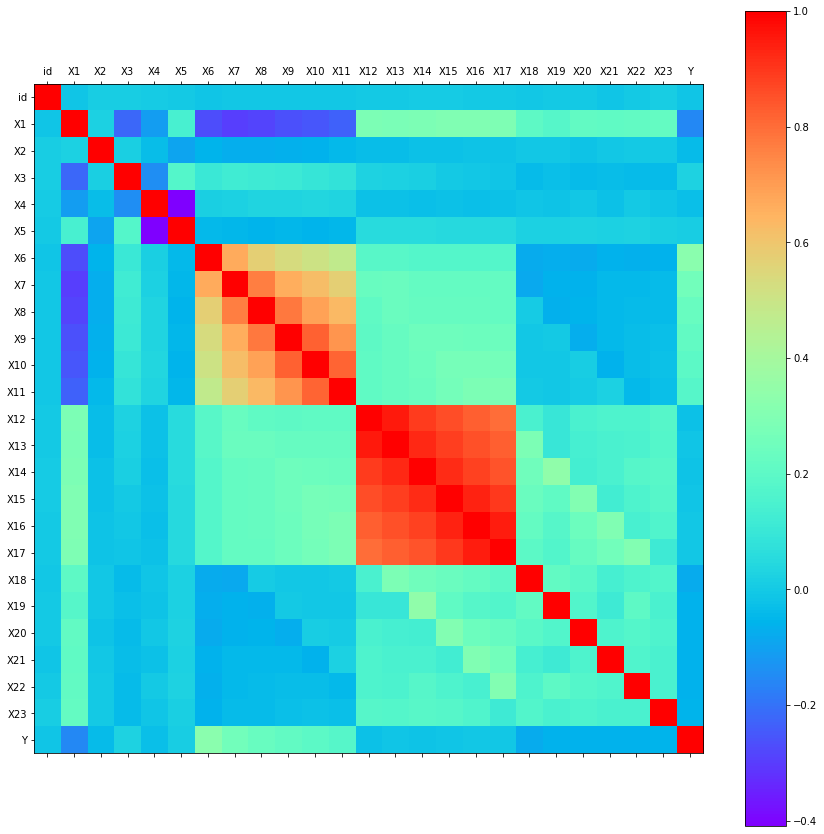

In [24]:
def plot_corr(df,size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr,cmap=plt.get_cmap('rainbow'))
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(cax)
plot_corr(credit_card_raw_data)


ii. Check the pattern of the label

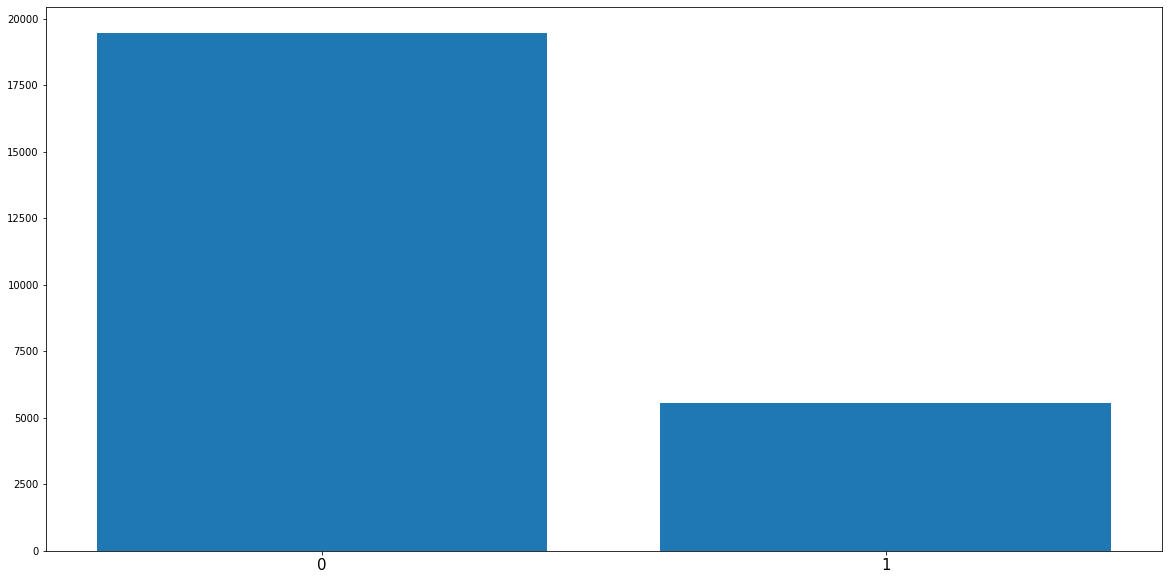

In [25]:
fig = plt.figure(figsize=(20,10))
plt.bar(credit_card_raw_data['Y'].value_counts().index, credit_card_raw_data['Y'].value_counts().values)
plt.xticks(credit_card_raw_data['Y'].value_counts().index,fontsize=15)
plt.show()

Method to deal with imbalanced data
1. Choose a good metrics: <br/>Confusion Matrix: recision/Recall/F1-score
2. Resampling Your Dataset:
  * You can add copies of instances from the under-represented class called over-sampling
  * use systematic algorithms to generate new instances: Synthetic Minority Over-sampling Technique
  * You can delete instances from the over-represented class, called under-sampling
  * imbalanced-learn package: https://github.com/scikit-learn-contrib/imbalanced-learn
3. Penalized Models: <br/>
比如在RandomForestClassifier里面调节class_weight={0:1,1:4}，LogisticRegression里调节 penalty, penalized-SVM
...

**4. Build a baseline model**
* Compare different models to see which one has the best performance
* Choose one of the models and use grid_search function to tune the parameters

In [27]:
from sklearn.model_selection import train_test_split
Y = credit_card_raw_data['Y']
X = credit_card_raw_data.drop(['Y', 'id'], axis= 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

RF = RandomForestClassifier(class_weight = {0:1, 1:3})
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3923
           1       0.63      0.33      0.43      1077

    accuracy                           0.81      5000
   macro avg       0.73      0.64      0.66      5000
weighted avg       0.79      0.81      0.79      5000



In [29]:
dt = DecisionTreeClassifier(class_weight = {0:1, 1:3})
dt = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3923
           1       0.36      0.39      0.37      1077

    accuracy                           0.72      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.73      0.72      0.72      5000



In [31]:
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3923
           1       0.38      0.18      0.24      1077

    accuracy                           0.76      5000
   macro avg       0.59      0.55      0.55      5000
weighted avg       0.71      0.76      0.72      5000



In [36]:
logistic_reg = LogisticRegression(class_weight = {0:1, 1:3})
logistic_reg = logistic_reg.fit(x_train, y_train)
y_pred = logistic_reg.predict(x_test)
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3923
           1       0.35      0.38      0.37      1077

    accuracy                           0.71      5000
   macro avg       0.59      0.59      0.59      5000
weighted avg       0.72      0.71      0.72      5000



**5. Basic parameter tuning: Grid Searching**

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def search_model(x_train, y_train, est, param_grid, n_jobs, cv):
    model = GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring = 'f1_weighted',
                                     verbose = 10,
                                     n_jobs = n_jobs,
                                     iid = True,
                                     cv = cv)
    # Fit Grid Search Model
    model.fit(x_train, y_train)   
    return model

In [20]:
param_grid = {'n_estimators':[100,300,500],
             'criterion':['gini', 'entropy'],
             'class_weight': [{0:1, 1:3}, {0:1, 1:4}]}

RF = search_model(X.values
            , Y.values
            , RandomForestClassifier()
            , param_grid
            , -1
            , 5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini, score=0.786199, total=   7.2s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini, score=0.798215, total=   7.2s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=100, class_weight

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.8s


[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.786820, total=  21.8s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.787760, total=  21.8s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.799774, total=  22.0s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.791607, total=  21.5s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   30.8s


[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.789000, total=  21.8s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.784716, total=   9.7s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.800628, total=  13.8s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.790156, total=  13.8s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.792642, total=  15.3s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=gini, score=0.783937, total=  42.2s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, c

[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.2min remaining:   42.1s


[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=gini, score=0.788561, total=  47.0s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.787667, total=  35.2s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.800658, total=  33.7s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.795553, total=  29.6s
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.795088, total=  30.3s


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.5min remaining:   26.7s


[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.793099, total=  30.2s
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.789237, total=  41.6s
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.796128, total=  38.4s
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.799605, total=  38.6s


[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.9min remaining:   12.6s


[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.791426, total=  35.1s
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.793801, total=  33.6s


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


In [21]:
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)
print("Scores:", RF.grid_scores_) 

Best score: 0.794
Best parameters set: {'n_estimators': 300, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy'}
Scores: [mean: 0.79117, std: 0.00392, params: {'n_estimators': 100, 'class_weight': {0: 1, 1: 3}, 'criterion': 'gini'}, mean: 0.79099, std: 0.00468, params: {'n_estimators': 300, 'class_weight': {0: 1, 1: 3}, 'criterion': 'gini'}, mean: 0.79136, std: 0.00500, params: {'n_estimators': 500, 'class_weight': {0: 1, 1: 3}, 'criterion': 'gini'}, mean: 0.79228, std: 0.00515, params: {'n_estimators': 100, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy'}, mean: 0.79441, std: 0.00419, params: {'n_estimators': 300, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy'}, mean: 0.79404, std: 0.00361, params: {'n_estimators': 500, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy'}]


In [27]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, Y)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1234)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF = RandomForestClassifier(class_weight = {0:1, 1:3})
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3864
           1       0.87      0.81      0.84      3917

    accuracy                           0.85      7781
   macro avg       0.85      0.85      0.85      7781
weighted avg       0.85      0.85      0.85      7781



### Test data pattern check
* Before we deploy our model, we would like to check the test data pattern
to make sure the distribution is matching so that deploying our machine 
learning model is reasonable

**Check the pattern differences between the training data and testing data**

In [37]:
online_new_data = pd.read_csv('test.csv')

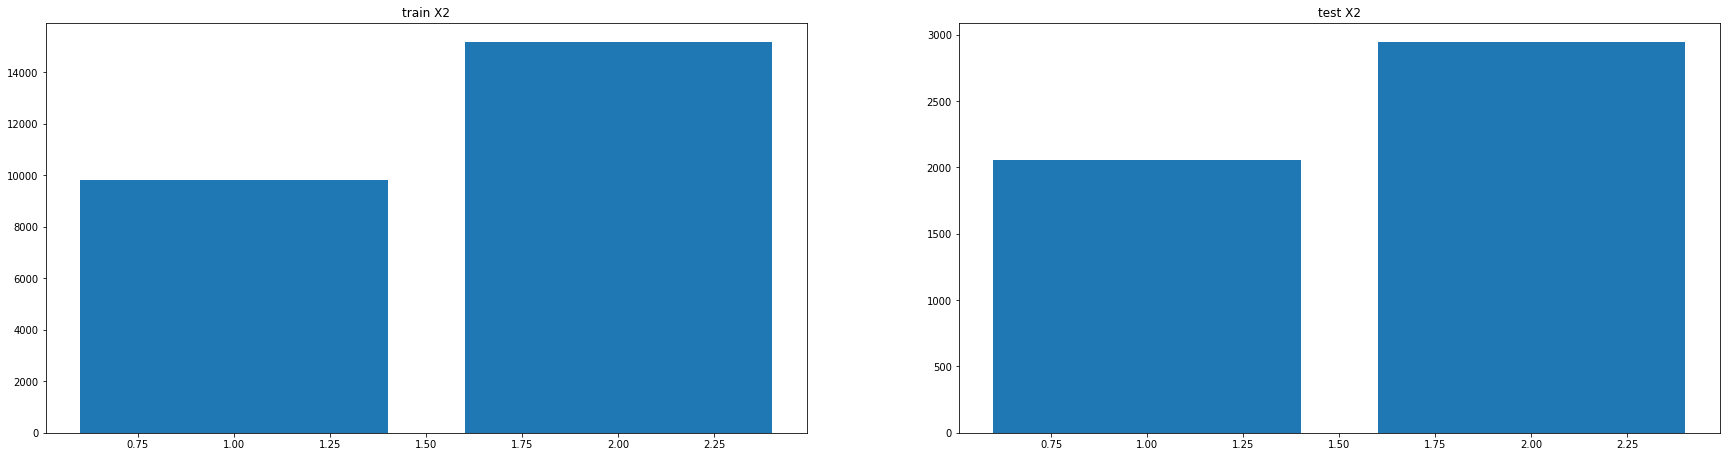

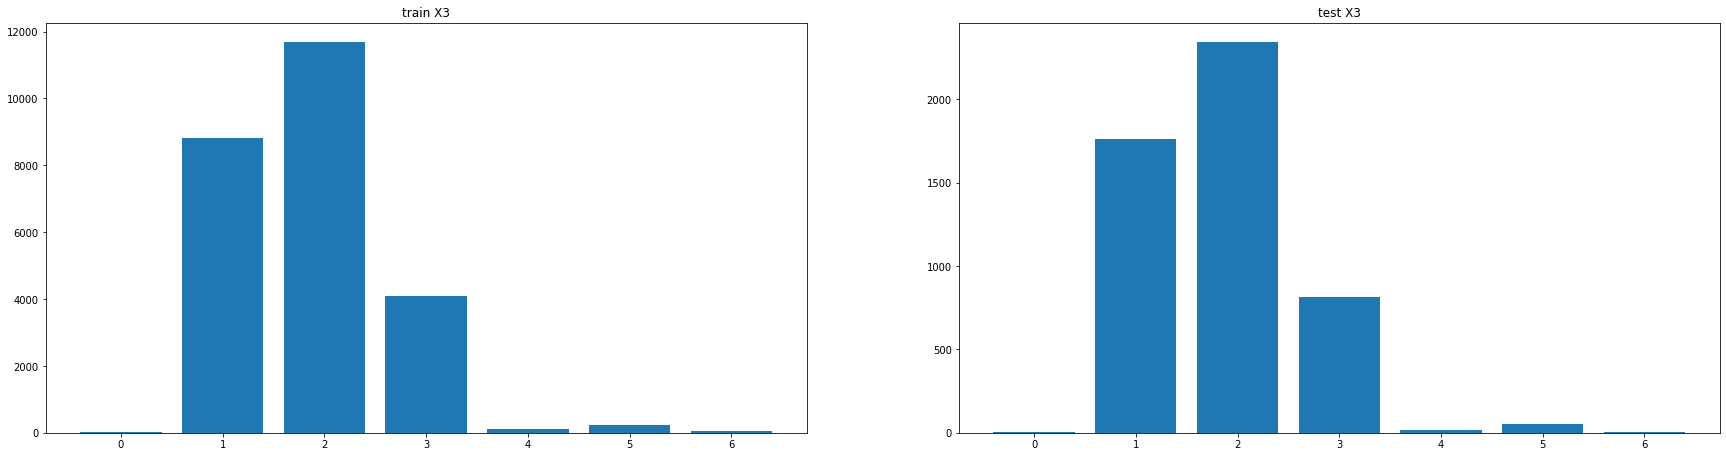

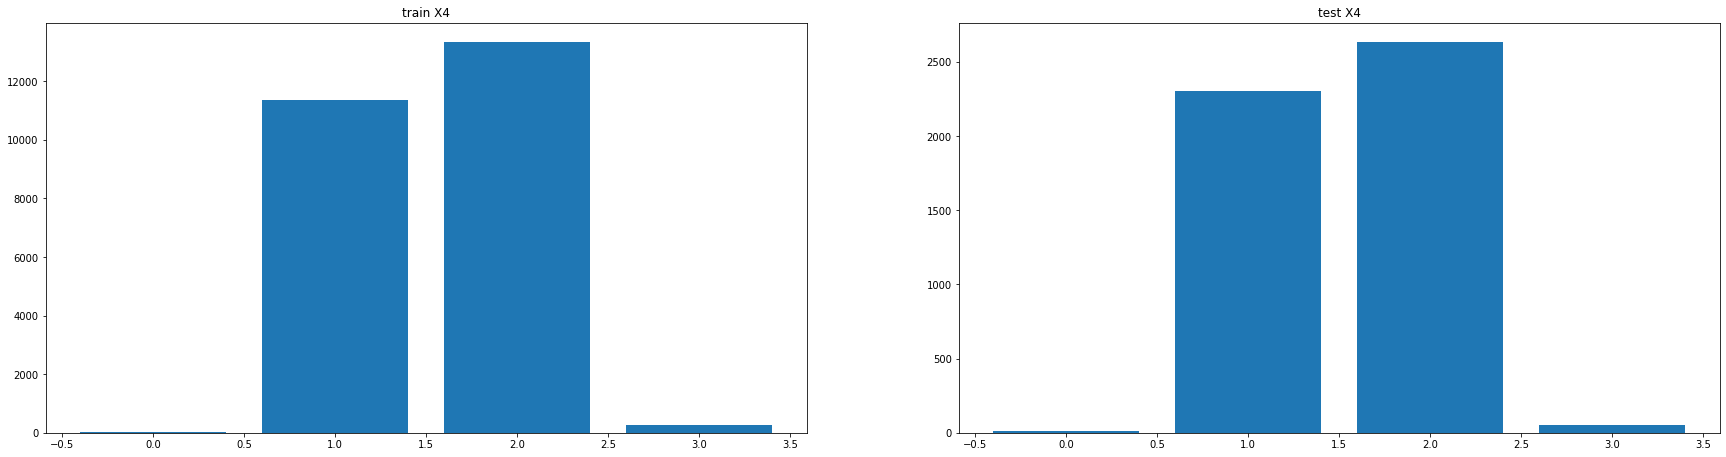

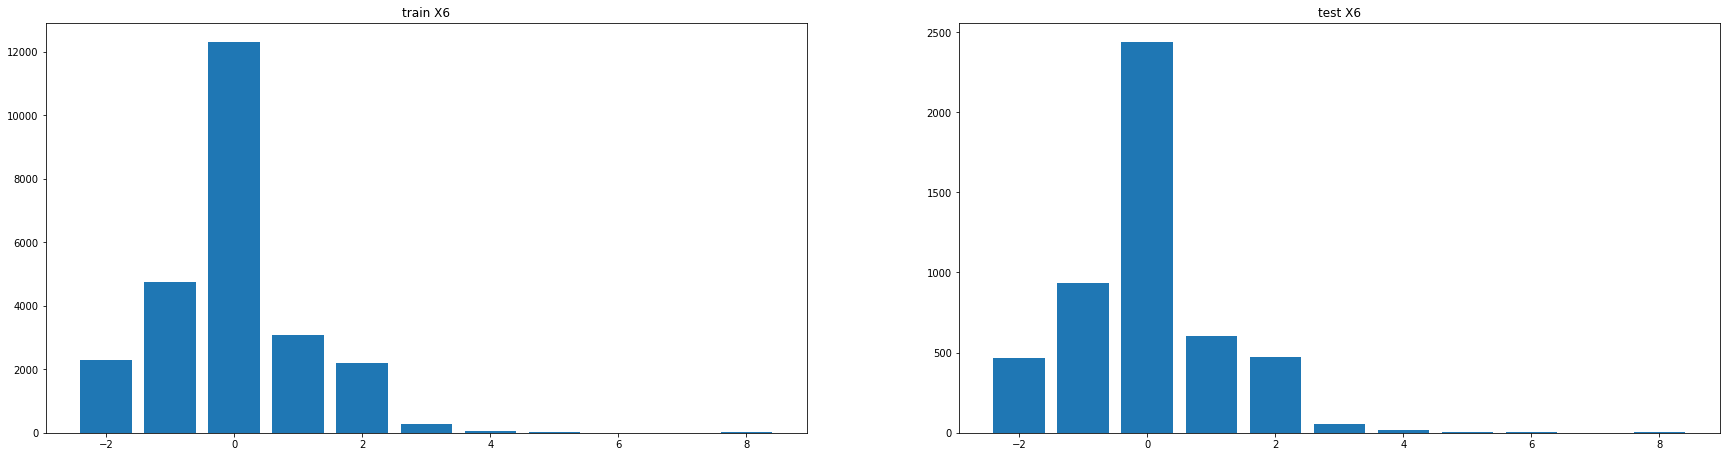

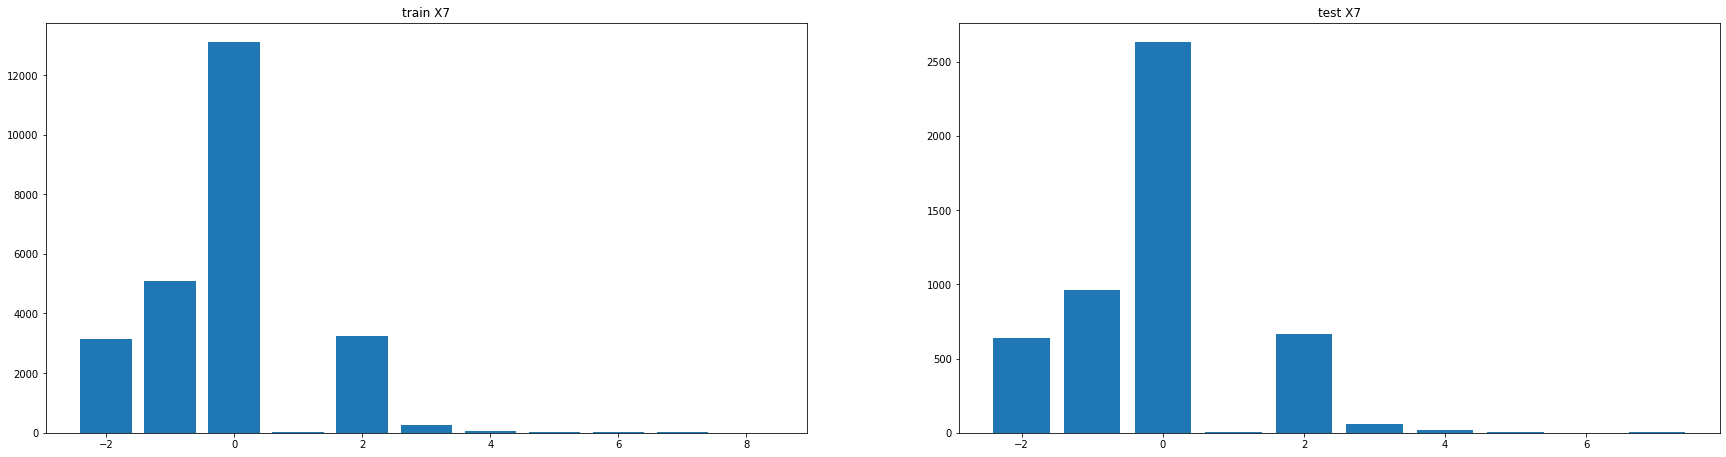

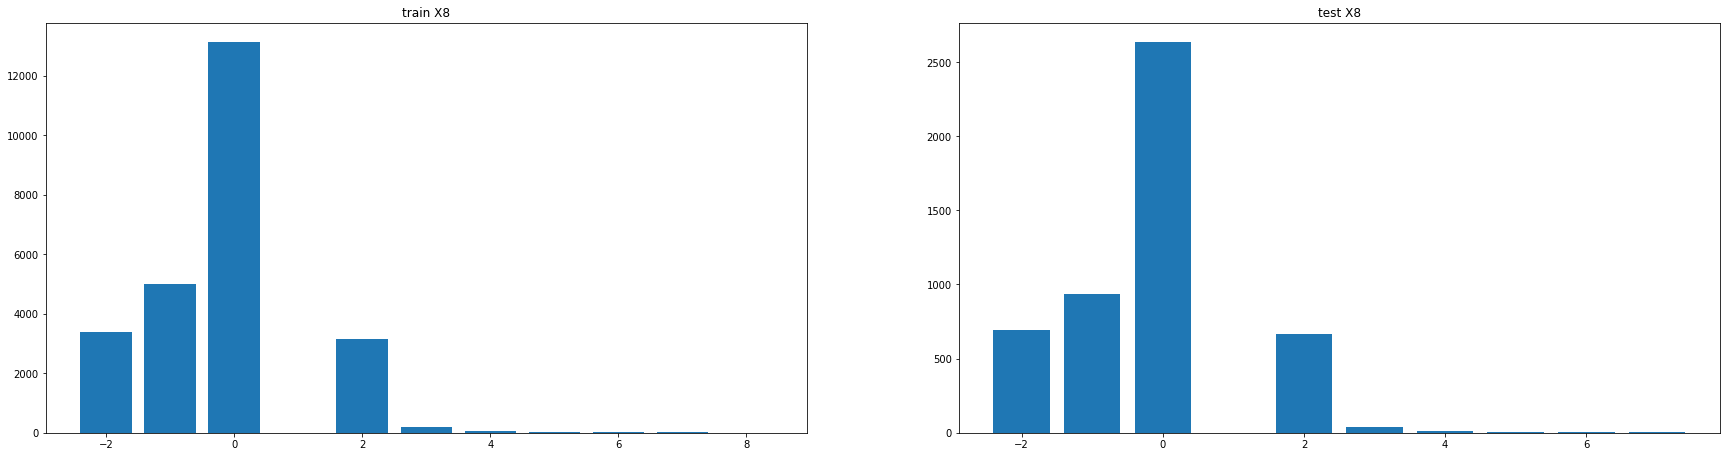

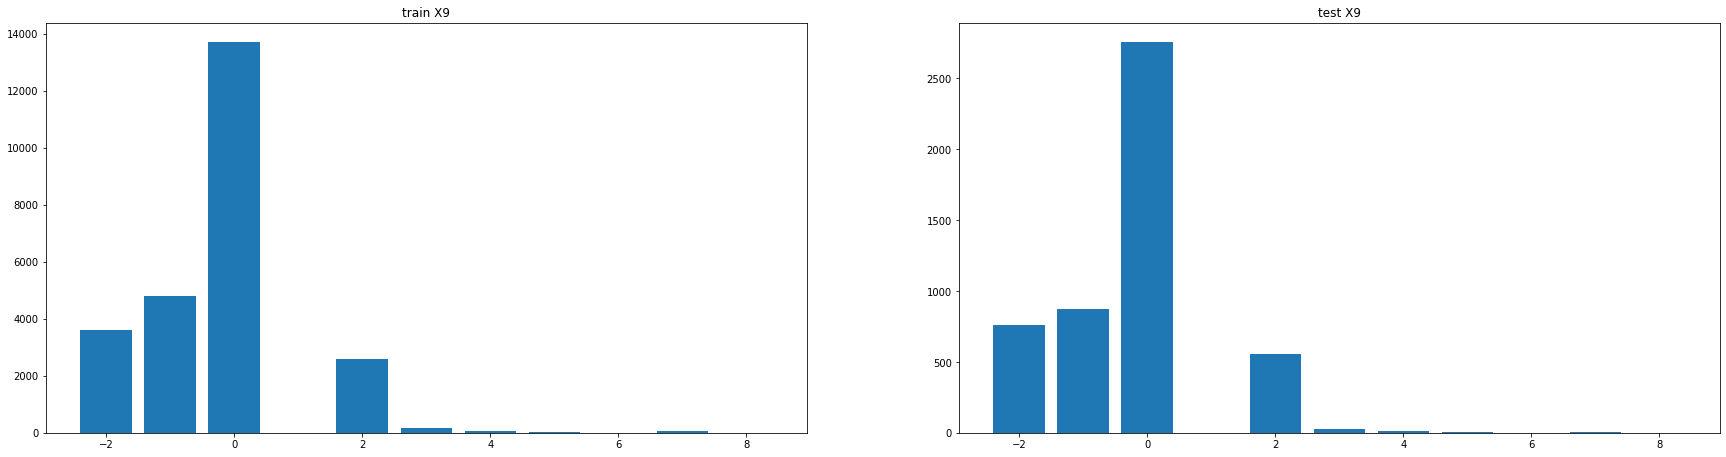

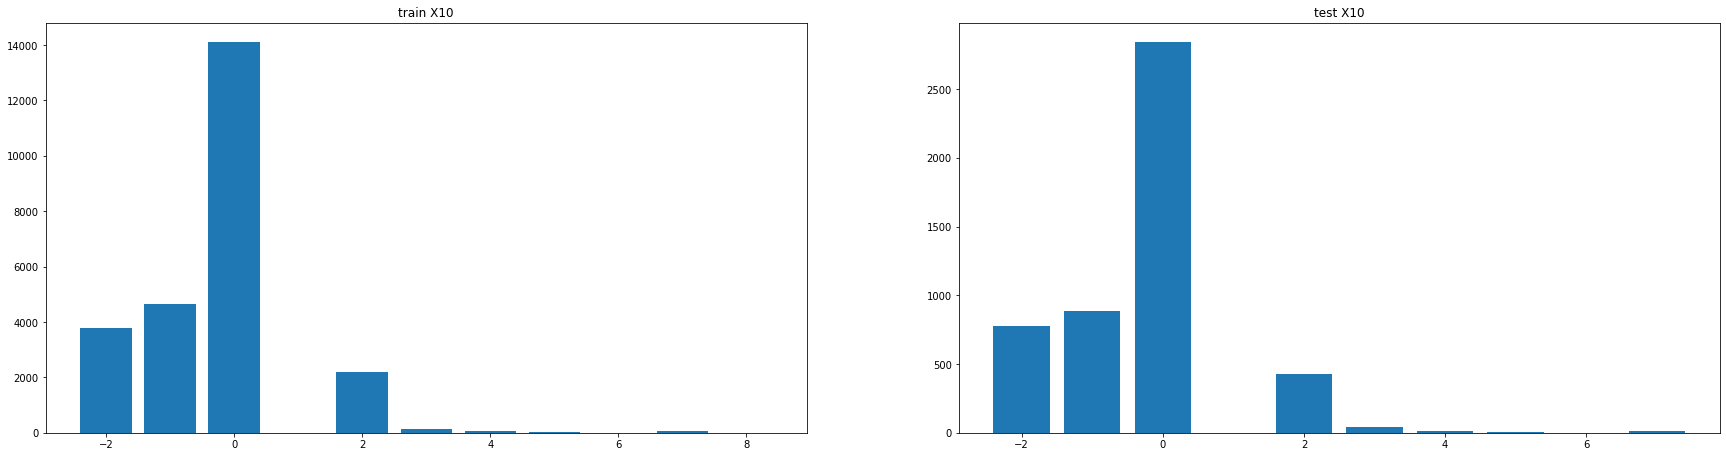

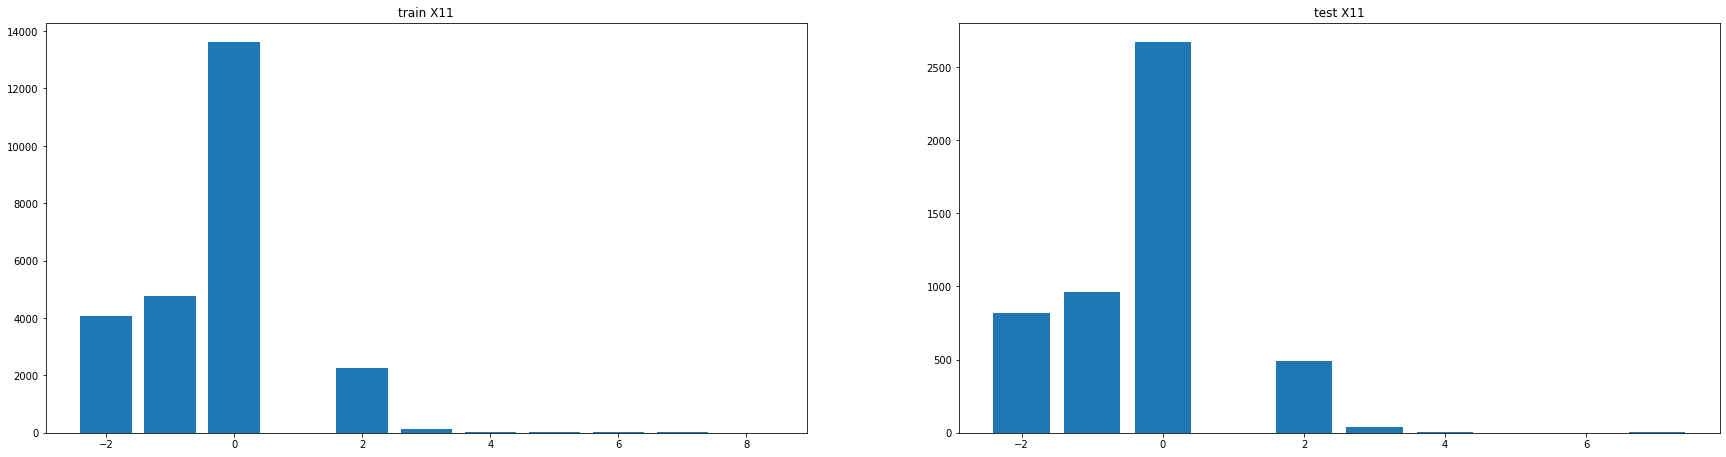

In [38]:
count=1
for i in range(len(cat_v)):
    fig = plt.figure(figsize=(30,80))
    plt.subplot(len(cat_v),2,count)
    plt.bar(credit_card_raw_data[cat_v[i]].value_counts().index, credit_card_raw_data[cat_v[i]].value_counts().values)
    plt.title("train "+cat_v[i])
    
    plt.subplot(len(cat_v),2,count+1)
    plt.bar(online_new_data[cat_v[i]].value_counts().index, online_new_data[cat_v[i]].value_counts().values)
    plt.title("test "+cat_v[i])
    count+=2

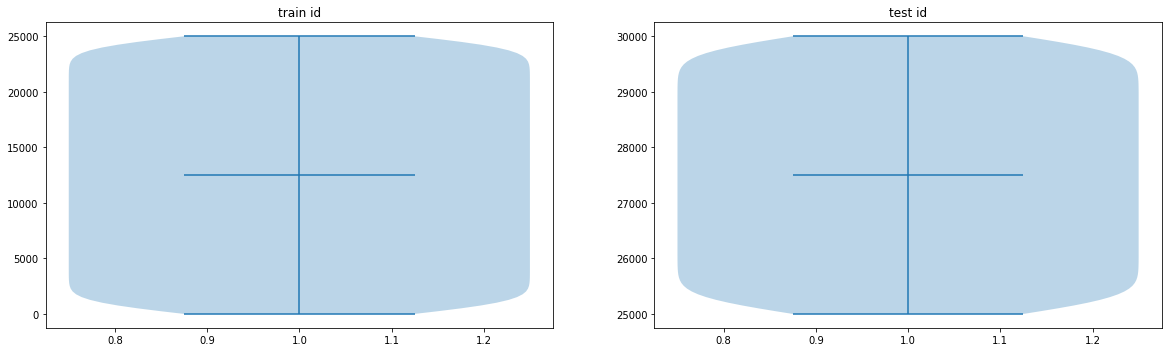

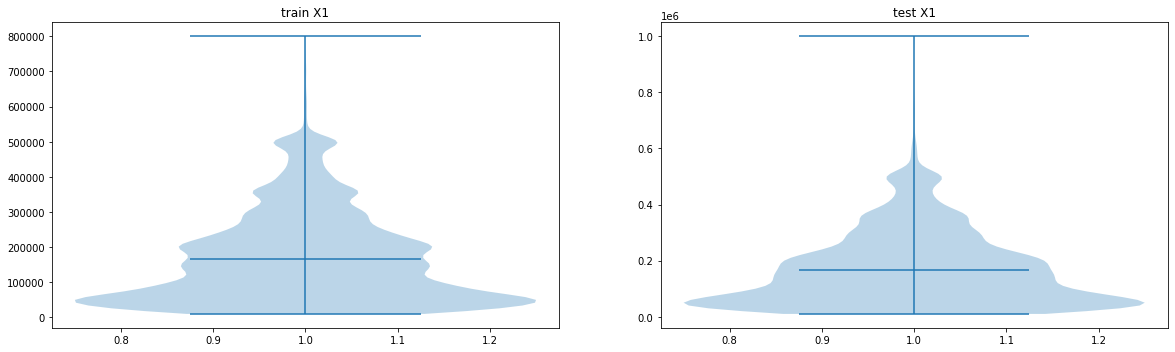

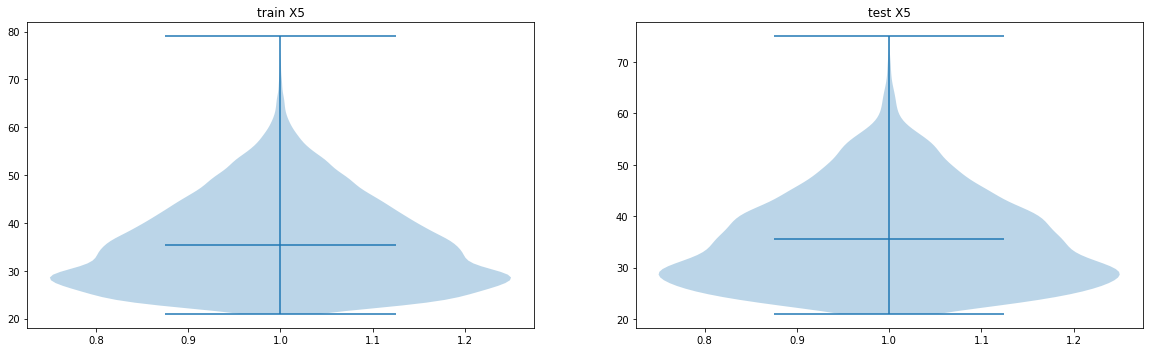

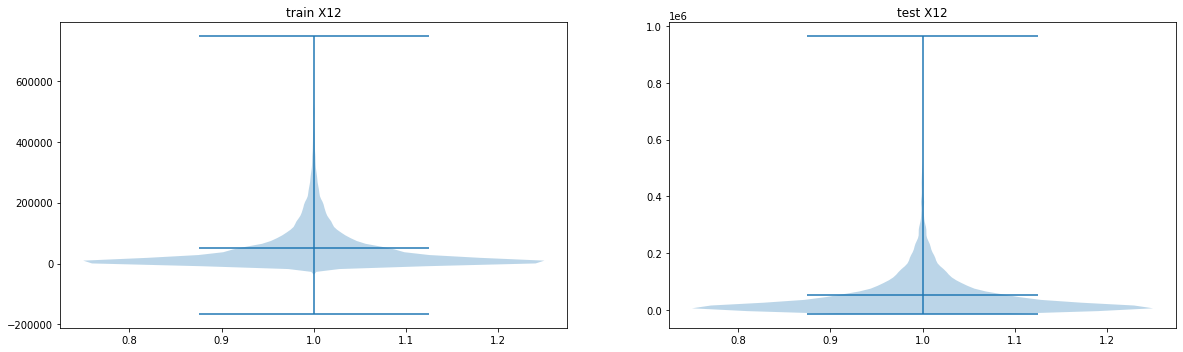

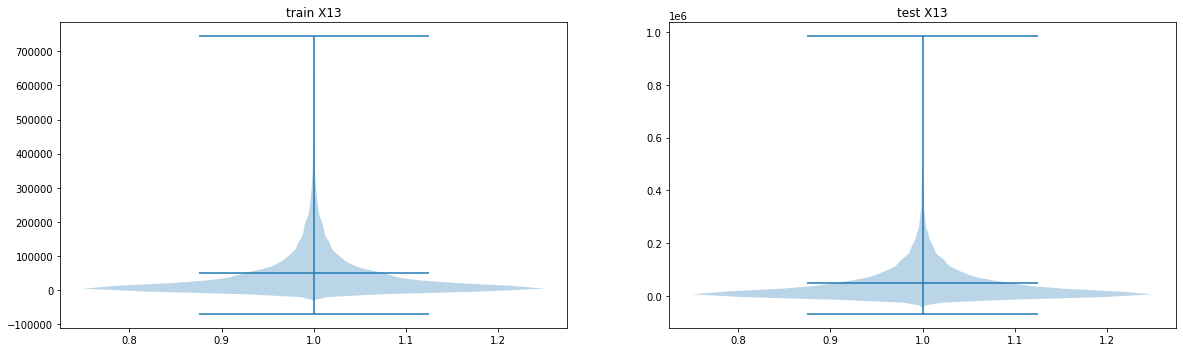

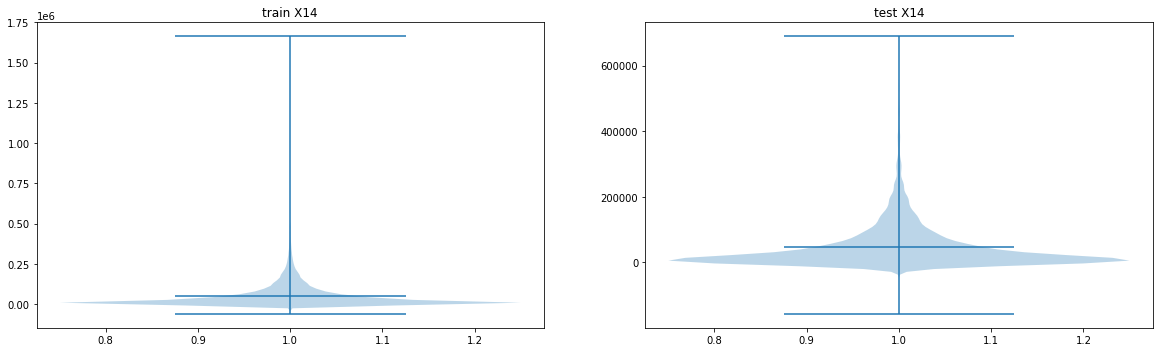

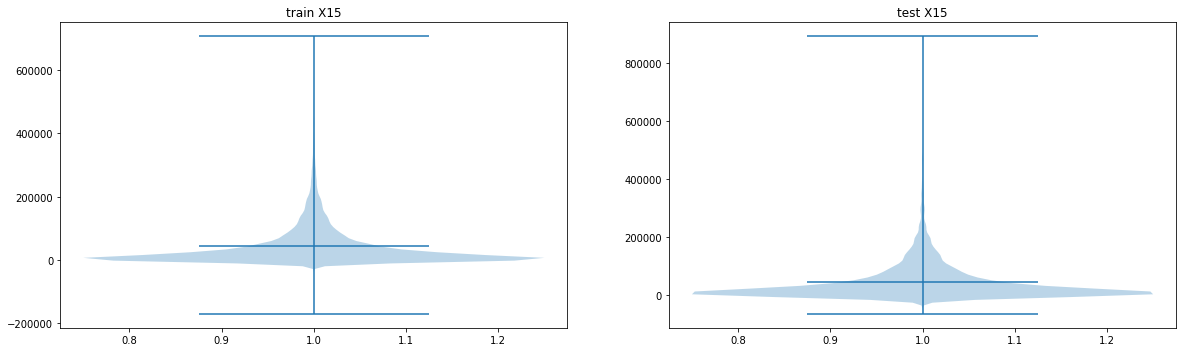

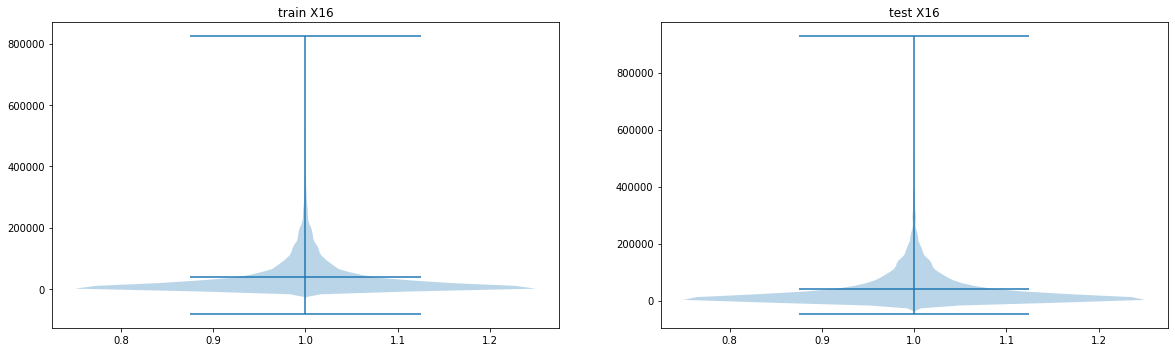

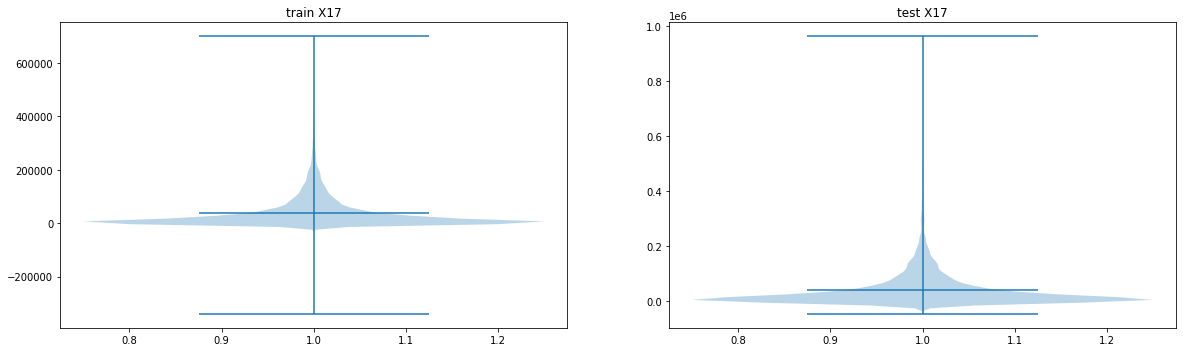

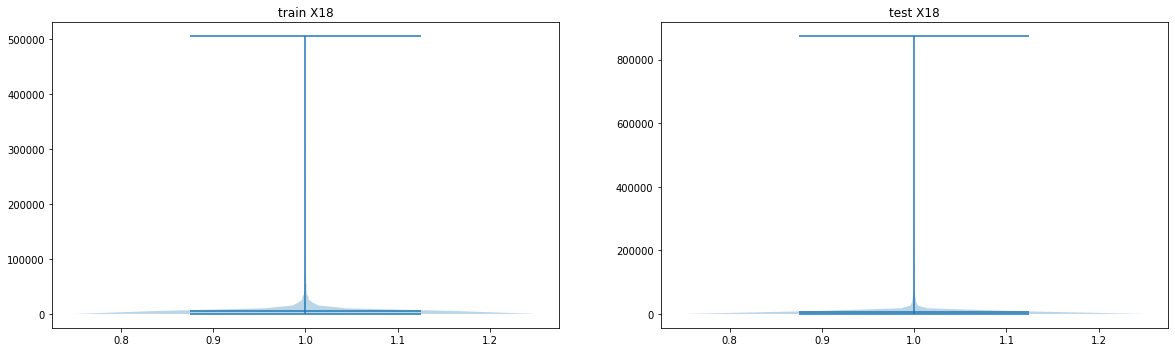

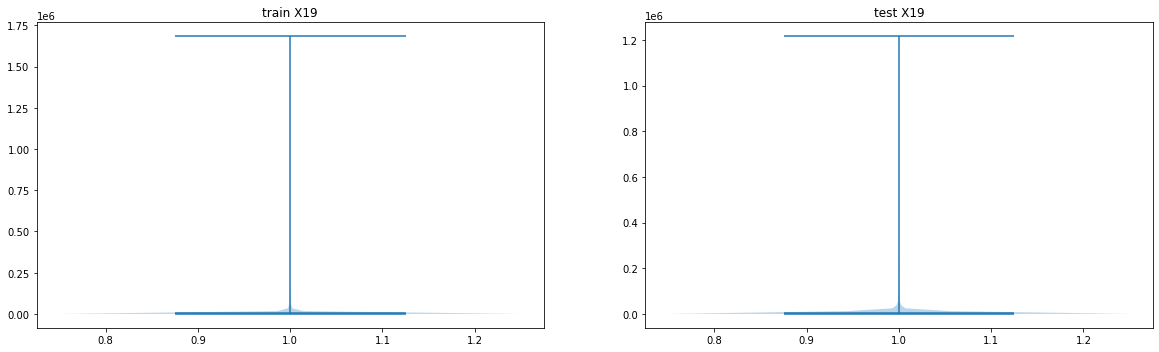

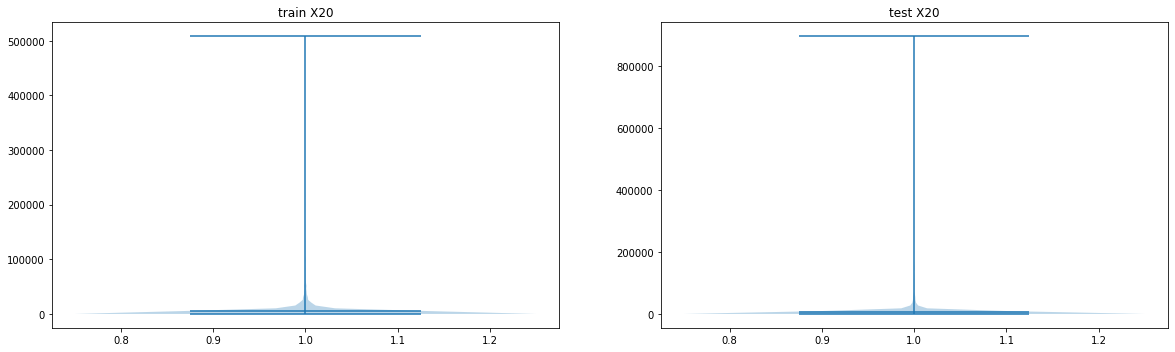

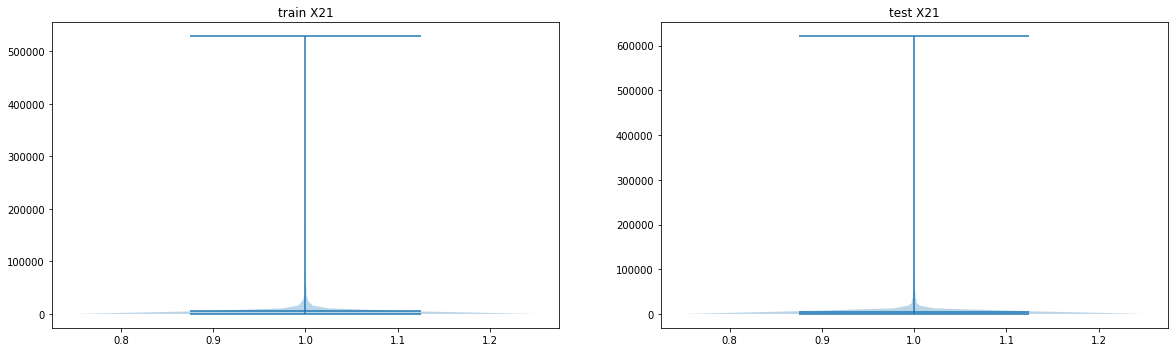

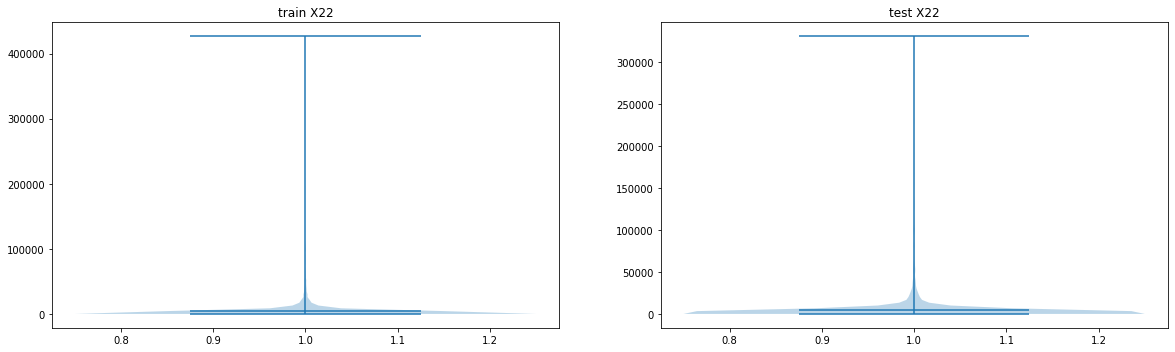

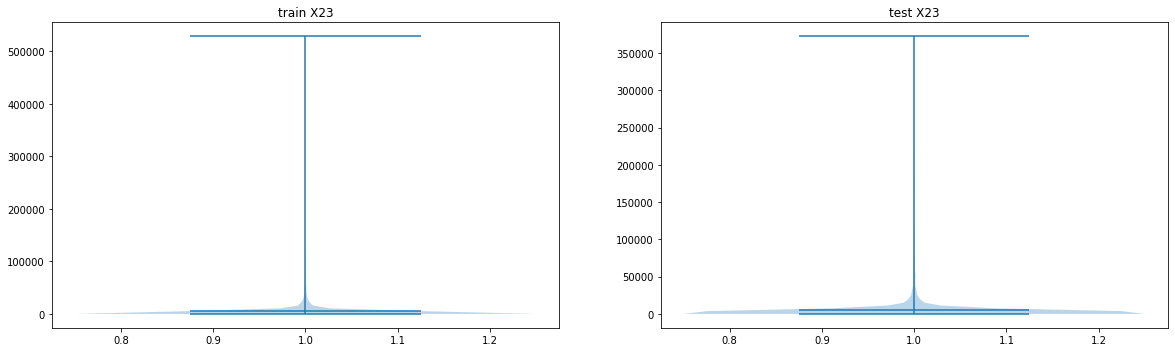

In [39]:
count=1
for i in range(len(con_v)):
    fig = plt.figure(figsize=(20,100))
    plt.subplot(len(con_v),2,count)
    plt.violinplot(credit_card_raw_data[con_v[i]],showmeans=True)
    plt.title("train "+con_v[i])
    
    plt.subplot(len(con_v),2,count+1)
    plt.violinplot(online_new_data[con_v[i]],showmeans=True)
    plt.title("test "+con_v[i])
    count+=2